# Case Limite de Emprestimo

In [51]:
import sqlite3 as sql
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [52]:
dados = pd.read_excel("BaseDados_RegressaoLinear.xlsx")
dados.tail()

,Salario,Limite_Emprestimo
94,3185.629581,7279.937858
95,3217.485877,7315.799621
96,3249.660736,7351.661384
97,3282.157343,7387.523147
98,3314.978916,7423.384910


In [53]:
dados.describe()

,Salario,Limite_Emprestimo
count,99.000000,99.000000
mean,2119.100581,4900.652060
std,600.832983,1378.113961
min,1250.219130,2900.124323
25%,1595.383780,3700.800280
50%,2035.792243,4722.412623
75%,2597.840528,6026.191986
max,3314.978916,7423.384910


Convertendo os Dados em Array pra ganhar performance

In [54]:
eixo_x = dados.iloc[:,0].values
eixo_y = dados.iloc[:,1].values

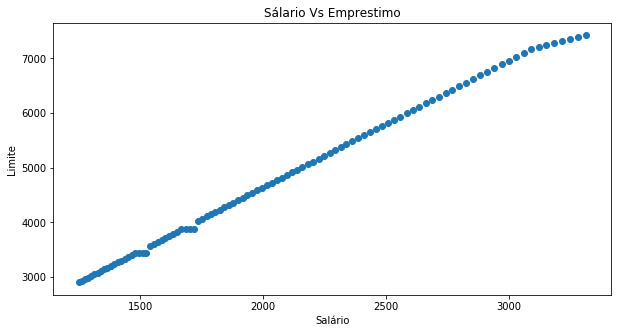

In [82]:
plt.figure(figsize=(10,5))
plt.scatter(eixo_x, eixo_y);
plt.title('Sálario Vs Emprestimo')
plt.xlabel("Salário")
plt.ylabel('Limite');

Verificando valores Nulos no grafica com Seaborn

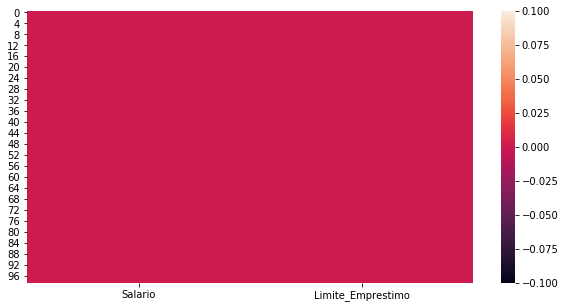

In [56]:
plt.figure(figsize=(10,5))
sns.heatmap(dados.isnull());

# Calculando Correlação nos dados
    O que é correlação: é o processo que avalia se uma variavél explica a outra.
    Ela tem uma escala de -1 a 1

In [57]:
correl = np.corrcoef(eixo_x, eixo_y)
correl

array([[1.        , 0.99949773],
       [0.99949773, 1.        ]])

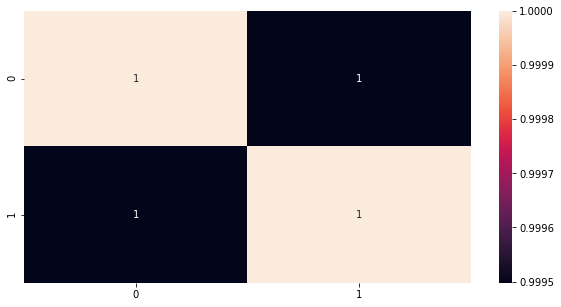

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(correl, annot= True);

Convertendo os dados em Matriz 

In [59]:
eixo_x = eixo_x.reshape(-1,1)
eixo_y = eixo_y.reshape(-1,1)

Separando os dados para treino e testes

In [60]:
x_treinamento, x_teste, y_treinamento, y_teste = train_test_split(
    eixo_x,
    eixo_y,
    test_size=0.20 
)

In [61]:
len(x_treinamento), len(x_teste)

(79, 20)

# Importando e Aplicando o modelo de regressão Linear

In [62]:
from sklearn.linear_model import LinearRegression

funcao_Regressao = LinearRegression()

Usando a função de regressão para treinar o nosso moedelo

In [63]:
funcao_Regressao.fit(x_treinamento, y_treinamento)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Usando o Score para analisar o quanto as duas variaveis se relacionam ou se explicam

In [64]:
funcao_Regressao.score(x_treinamento, y_treinamento)

0.9989261170570494

Plotando a Reta de Regrassão e faznedo um aprevisão de valores no grafico com x_teste

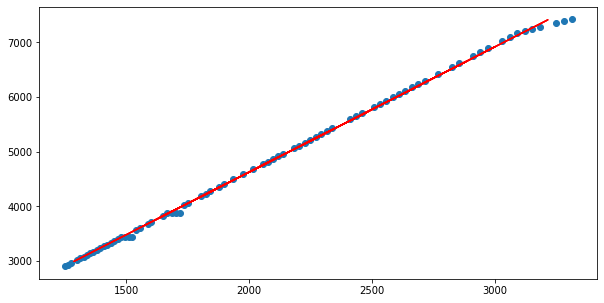

In [65]:
plt.figure( figsize=(10,5) )
plt.scatter(x_treinamento, y_treinamento)
plt.plot(x_teste, funcao_Regressao.predict(x_teste), color='Red');



# Avaliando desempenho do nosso modelo

Avaliando o quanto nosso modelo está errando ao fazer a previsão

In [66]:
from sklearn import metrics # função pra calcular a médio de erro do moedelo

In [68]:
previsoes = funcao_Regressao.predict(x_teste)
print("RMSE:", np.sqrt(metrics.mean_squared_error(y_teste, previsoes)))

RMSE: 30.850861054468954


# Prevendo o Limite de Emprestimo de acordo ao Sálario!!!!!!

In [81]:
salario = 5800
limite = funcao_Regressao.predict([[salario]])

print(" Uma Pessoa que ganha",salario," o Limite previsto de Emprestimo é: ", limite)

 Uma Pessoa que ganha 5800  o Limite previsto de Emprestimo é:  [[13335.95104171]]
